<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/CNNs/3_ImageClassificationCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification on CIFAR-10**

🎯 **Goal:** The main goal of this application is to build a model that classifies images from give images

🗄️ **Dataset:** [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class

**I. Import Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**II. Prepare Data**

In [2]:
# Get the dataset
dataset = tf.keras.datasets.cifar10
# Separate train and test samples
(xTrain, yTrain), (xTest, yTest) = dataset.load_data()
# Pre-processing: normalizing data
xTrain, xTest = xTrain / 255.0, xTest / 255.0
# Now, check the outputs
print('Train data shape:', xTrain.shape)
print('Test data shape:', xTest.shape)
print('Train labels shape:', yTrain.shape)
print('Test labels shape:', yTest.shape)

170508288/170498071 [==============================] - 4s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test labels shape: (10000, 1)


**III. Check Some of Data Instances**

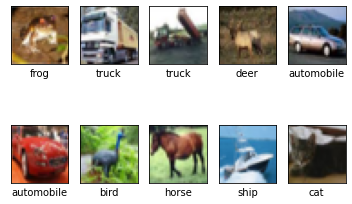

In [3]:
# What classes do we need?
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck']

for index in range(len(classes)):
  plt.subplot(2, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTrain[index])
  plt.xlabel(classes[yTrain[index][0]])
plt.show()

**IV. Create the Model**

In [4]:
# Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)), # make a vector instead of 3D shape for each sample
    tf.keras.layers.Dense(10) # 32*32*3*10 connections
])
model.summary()

# Flatten has 3072 inputs and 0 parameters (from previous layer)
# Dense has 10 outputs and (32*32*3 * 10 weights) + 10 bias = 30,730

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


**V. Training and Evaluation**

In [5]:
# For each sample, we have a vector of logits
predictions = model(xTrain[:1]).numpy()
predictions

# Now, converting these values into probabilities using SoftMax
tf.nn.softmax(predictions).numpy()

array([[0.09388438, 0.08184125, 0.11168475, 0.0954366 , 0.0740728 ,
        0.10574789, 0.1214475 , 0.13258453, 0.09475431, 0.08854595]],
      dtype=float32)

In [6]:
# Loss function and optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss(yTrain[:1], predictions).numpy()
# The loss function is going to show negative probability, it would be close to 2.4 (tf.math.log(1/10))

2.1082733

In [7]:
# Adam optimizer
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
# Start training
model.fit(xTrain, yTrain, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9668 - accuracy: 0.3156
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8842 - accuracy: 0.3492
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8543 - accuracy: 0.3627
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8442 - accuracy: 0.3689
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8285 - accuracy: 0.3745
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8247 - accuracy: 0.3794
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8238 - accuracy: 0.3790
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8107 - accuracy: 0.3814
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8028 - accuracy: 0.3849
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.800

In [8]:
# Accuracy on the testing data (the previous cell was for trainig data validation)
testLoss, testAcc = model.evaluate(xTest, yTest, verbose=2)
print('Accuracy:', testAcc)

313/313 - 0s - loss: 1.9520 - accuracy: 0.3486 - 488ms/epoch - 2ms/step
Accuracy: 0.34860000014305115


**VI. Prediction**

In [9]:
# Make some predictions
# Returning probability by wrapping the model in a softmax layer
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediction = probabilityModel.predict(xTest[:5]) # Testing the first 5 images
prediction[0]

array([0.00525405, 0.01971849, 0.04610131, 0.23292789, 0.00520742,
       0.24810022, 0.33073437, 0.00251829, 0.10880923, 0.00062873],
      dtype=float32)

In [11]:
# Applying a lablel and compare with the test label
print('Predicted labels:', np.argmax(prediction, axis=1))
print('Original labels:', yTest[:5])

Predicted labels: [6 9 8 7 4]
Original labels: [[3]
 [8]
 [8]
 [0]
 [6]]


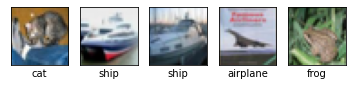

In [12]:
# Plot the first five images
for index in range(5):
  plt.subplot(1, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTest[index])
  plt.xlabel(classes[yTest[index][0]])
plt.show()

(3072, 10)


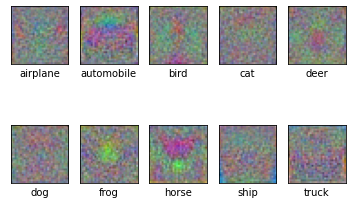

In [16]:
# What are the learned parameters
filters, biases = model.layers[1].get_weights() # layer1 weights
filterMin, filterMax = filters.min(), filters.max()
filters = (filters - filterMin) / (filterMax - filterMin)
print(filters.shape)

# Reshape to RGB
filtersRgb = filters.reshape(32, 32, 3, 10)
# Plot the 10 filters
numberOfFilters = 10
for index in range(numberOfFilters):
  filter = filtersRgb[:, :, :, index]
  plt.subplot(2, 5, index+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(classes[index])
  plt.imshow(filter)
plt.show()